# Price_in_lakhs is target variable 

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

import warnings
warnings.filterwarnings("ignore")


In [2]:
ihp = pd.read_csv("india_housing_prices.csv")
ihp.head(1)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740.0,489.76,0.1,1990,Furnished,22.0,1,35.0,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move


In [3]:
ihp[ihp.Property_Type=="Apartment"].head(1)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740.0,489.76,0.1,1990,Furnished,22.0,1,35.0,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move


In [4]:
ihp[ihp.duplicated()] #Duplicates

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status


In [5]:
ihp.shape

(250000, 23)

In [6]:
ihp.Price_in_Lakhs.dropna(inplace=True)

In [7]:
ihp.Price_in_Lakhs.isnull().sum()

np.int64(343)

In [8]:
ihp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           249956 non-null  object 
 2   City                            249971 non-null  object 
 3   Locality                        249809 non-null  object 
 4   Property_Type                   249837 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    249462 non-null  float64
 7   Price_in_Lakhs                  249657 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                249357 non-null  object 
 11  Floor_No                        249988 non-null  float64
 12  Total_Floors    

In [9]:
ihp.shape[0]

250000

# Null values 

In [10]:
ihp.isnull().sum()/ihp.shape[0]*100

ID                                0.0000
State                             0.0176
City                              0.0116
Locality                          0.0764
Property_Type                     0.0652
BHK                               0.0000
Size_in_SqFt                      0.2152
Price_in_Lakhs                    0.1372
Price_per_SqFt                    0.0000
Year_Built                        0.0000
Furnished_Status                  0.2572
Floor_No                          0.0048
Total_Floors                      0.0000
Age_of_Property                   0.0392
Nearby_Schools                    0.0000
Nearby_Hospitals                  0.0000
Public_Transport_Accessibility    0.0000
Parking_Space                     0.0000
Security                          0.0000
Amenities                         0.0000
Facing                            0.0000
Owner_Type                        0.0256
Availability_Status               0.0176
dtype: float64

# Dropping ID

In [11]:
ihp.drop("ID",axis=1,inplace=True)

In [12]:
ihp.head(1)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740.0,489.76,0.1,1990,Furnished,22.0,1,35.0,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move


In [13]:
ihp.describe()

,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,249462.000000,249657.000000,250000.000000,250000.000000,249988.000000,250000.000000,249902.000000,250000.000000,250000.000000
mean,2.999396,2749.816681,254.585476,0.130597,2006.520012,14.966878,15.503004,18.479976,5.499860,5.498016
std,1.415521,1300.599961,141.348869,0.130747,9.808575,8.948089,8.671618,9.808393,2.878639,2.871860
min,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,1623.000000,132.540000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,3.000000,2747.000000,253.860000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


# Dropping rows with null value of target varibales 

In [14]:
drop=ihp[ihp.Price_in_Lakhs.isnull()==True].index

In [15]:
drop

Index([126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       ...
       880, 881, 882, 883, 884, 885, 886, 887, 888, 889],
      dtype='int64', length=343)

In [16]:
ihp.drop(drop,inplace=True)

In [17]:
ihp.shape

(249657, 22)

In [18]:
ihp.reset_index(inplace=True)

# boxplot and distribution

In [19]:
ihp.drop("index",axis=1,inplace=True)

BHK


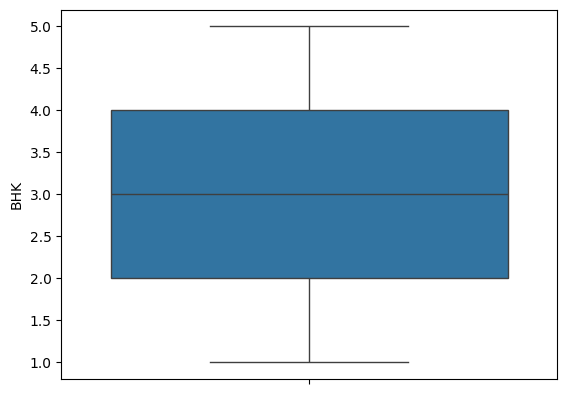

Size_in_SqFt


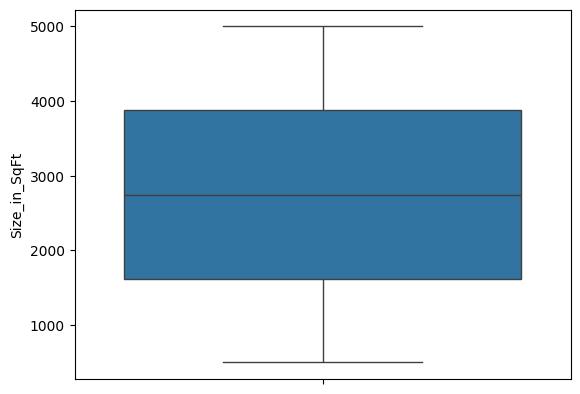

Price_in_Lakhs


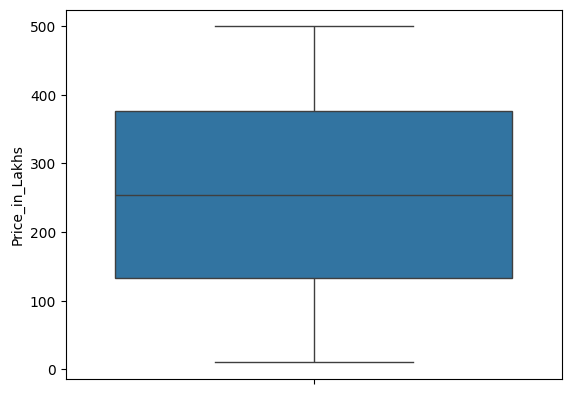

Price_per_SqFt


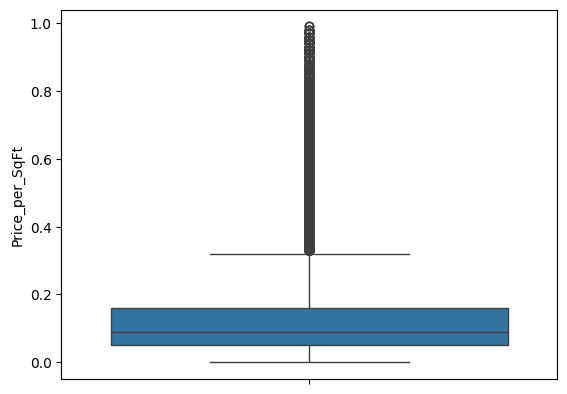

Year_Built


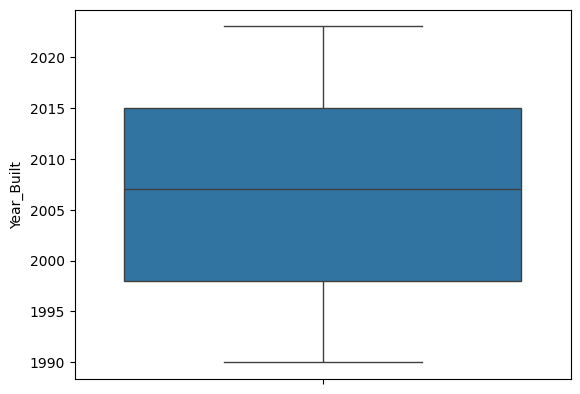

Floor_No


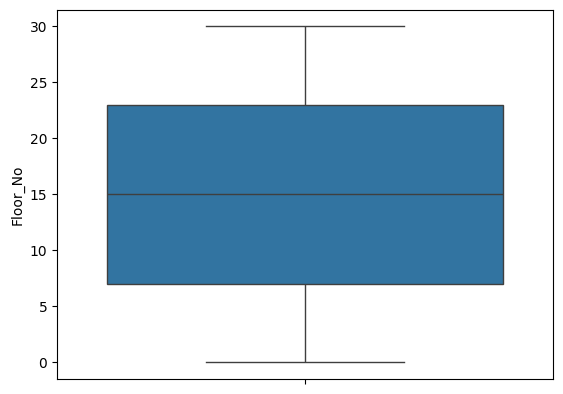

Total_Floors


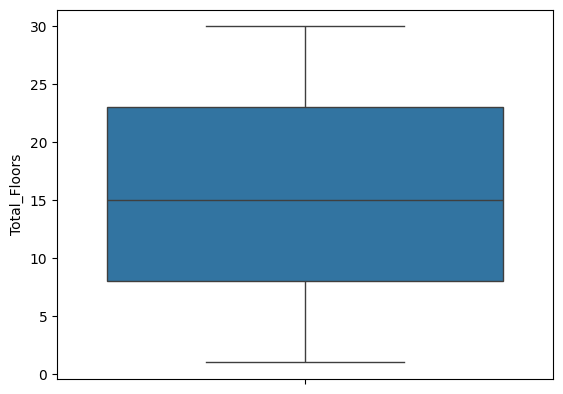

Age_of_Property


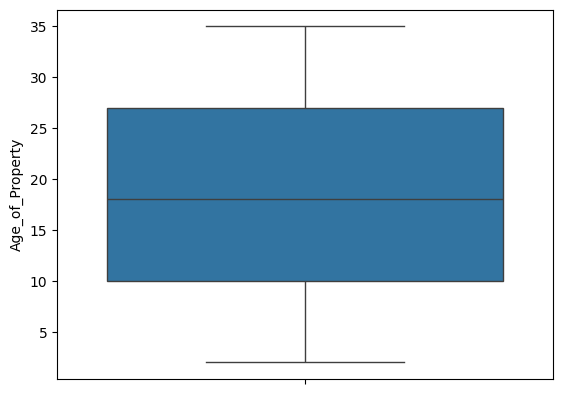

Nearby_Schools


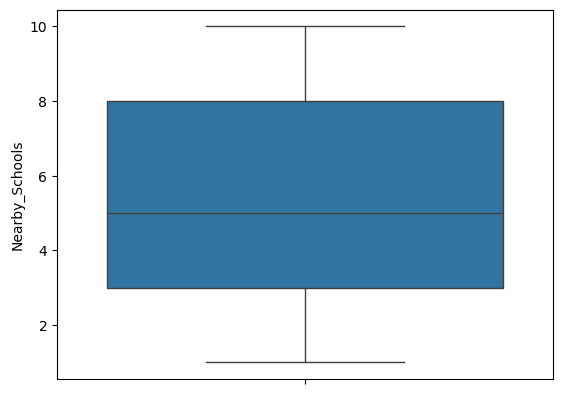

Nearby_Hospitals


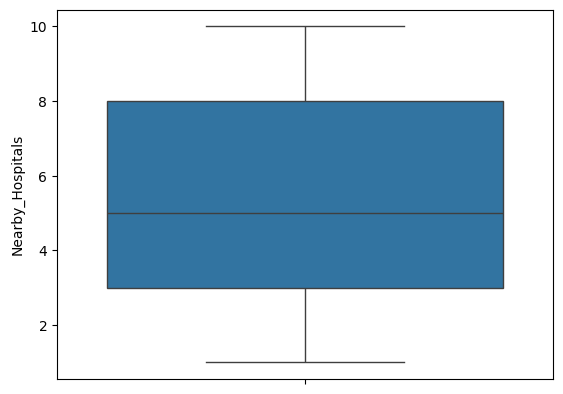

CPU times: user 2.34 s, sys: 147 ms, total: 2.48 s
Wall time: 2.56 s


In [20]:
%%time
for i in ihp.select_dtypes(exclude="object"):
    print(i)
    sns.boxplot(ihp[i])
    plt.show()

# Checking Duplicates 

In [21]:
ihp[ihp.duplicated()]

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status


# Distribution of categorical data 

In [22]:
ihp.Owner_Type.value_counts(normalize=True)*100

Owner_Type
Broker     33.387956
Builder    33.307424
Owner      33.304620
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='State'>

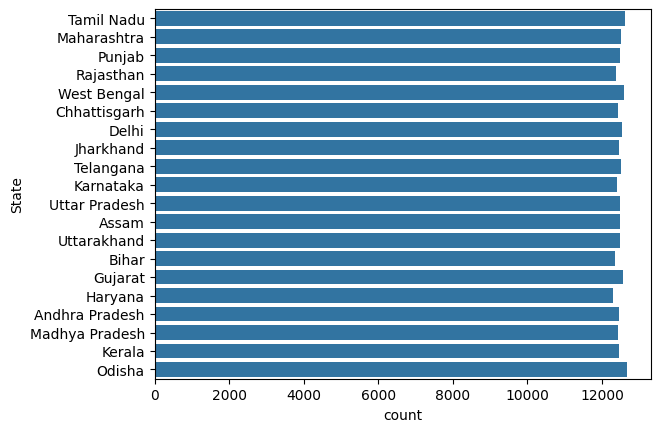

In [23]:
sns.countplot(y=ihp.State)

<Axes: xlabel='Floor_No', ylabel='Age_of_Property'>

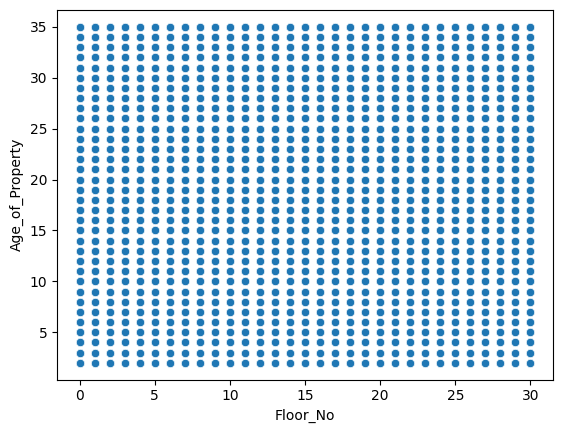

In [24]:
sns.scatterplot(x=ihp.Floor_No,y=ihp.Age_of_Property)

<Axes: >

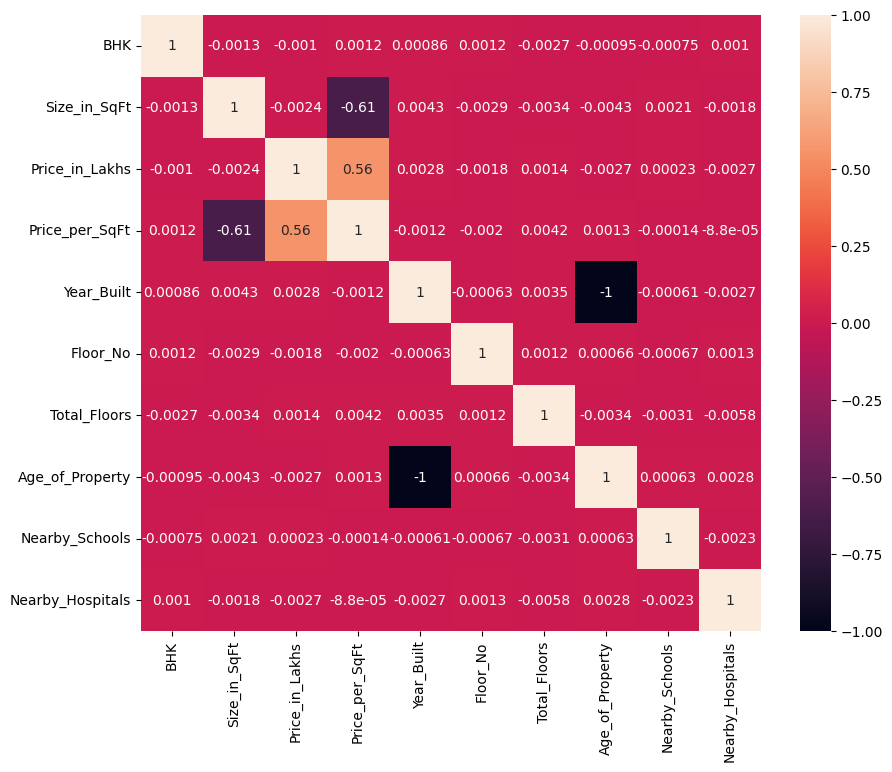

In [25]:
plt.figure(figsize=[10,8])
sns.heatmap(ihp.select_dtypes(exclude="object").corr(),annot=True)

<Axes: xlabel='Floor_No', ylabel='Price_in_Lakhs'>

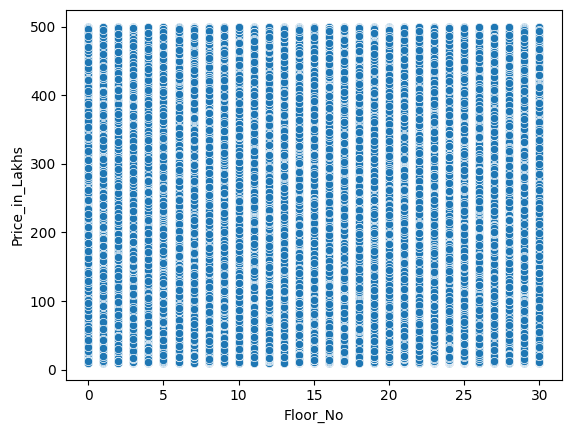

In [26]:
sns.scatterplot(y=ihp.Price_in_Lakhs,x = ihp.Floor_No)

# Data cleaning 

In [27]:
ihp.head(1)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740.0,489.76,0.1,1990,Furnished,22.0,1,35.0,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move


In [28]:
ihp.isnull().sum()


State                              44
City                               29
Locality                            0
Property_Type                       0
BHK                                 0
Size_in_SqFt                      350
Price_in_Lakhs                      0
Price_per_SqFt                      0
Year_Built                          0
Furnished_Status                  302
Floor_No                           12
Total_Floors                        0
Age_of_Property                    98
Nearby_Schools                      0
Nearby_Hospitals                    0
Public_Transport_Accessibility      0
Parking_Space                       0
Security                            0
Amenities                           0
Facing                              0
Owner_Type                         64
Availability_Status                44
dtype: int64

# Fill null values in State 

In [29]:
ihp.State.fillna(ihp.State.mode()[0],inplace=True)

# filling null values 

In [30]:
ihp.City.fillna(ihp.City.mode()[0],inplace=True)

In [31]:
ihp["Size_in_SqFt"].fillna(ihp["Size_in_SqFt"].mean(),inplace=True)

In [32]:
ihp["Age_of_Property"].fillna(ihp["Age_of_Property"].mean(),inplace=True)

In [33]:
ihp.isnull().sum()

State                               0
City                                0
Locality                            0
Property_Type                       0
BHK                                 0
Size_in_SqFt                        0
Price_in_Lakhs                      0
Price_per_SqFt                      0
Year_Built                          0
Furnished_Status                  302
Floor_No                           12
Total_Floors                        0
Age_of_Property                     0
Nearby_Schools                      0
Nearby_Hospitals                    0
Public_Transport_Accessibility      0
Parking_Space                       0
Security                            0
Amenities                           0
Facing                              0
Owner_Type                         64
Availability_Status                44
dtype: int64

In [34]:
ihp["Furnished_Status"].fillna(ihp["Furnished_Status"].mode()[0],inplace=True)

In [35]:
ihp["Floor_No"].fillna(ihp["Floor_No"].mean(),inplace=True)

In [36]:
ihp["Owner_Type"].fillna(ihp["Owner_Type"].mode()[0],inplace=True)

In [37]:
ihp["Availability_Status"].fillna(ihp["Availability_Status"].mode()[0],inplace=True)

In [38]:
ihp.isnull().sum()

State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [39]:
ihp.Locality=ihp["Locality"].apply(lambda x:x.split('_')[1])

In [40]:
data = ihp.copy()

In [41]:
X = data.drop("Price_in_Lakhs",axis=1)
y = data.Price_in_Lakhs

In [42]:
xtrain , xtest , ytrain , ytest = train_test_split(X,y,test_size=0.2,random_state=35)

In [43]:
xtrain.State.value_counts(normalize=True)*100

State
Tamil Nadu        5.076480
Delhi             5.059457
Odisha            5.058455
West Bengal       5.056453
Punjab            5.031418
Gujarat           5.029415
Uttar Pradesh     5.027413
Kerala            5.011891
Maharashtra       5.007385
Uttarakhand       5.004882
Andhra Pradesh    5.001878
Telangana         4.998373
Jharkhand         4.981349
Haryana           4.977344
Assam             4.963325
Karnataka         4.961322
Madhya Pradesh    4.960320
Rajasthan         4.944298
Chhattisgarh      4.935286
Bihar             4.913256
Name: proportion, dtype: float64

In [44]:
xtrain.City.nunique()

42

# outlier treatment in train data 

In [45]:
for i in xtrain.select_dtypes(include=np.number):
    q1=xtrain[i].quantile(0.25)
    q3=xtrain[i].quantile(0.75)
    iqr= q3-q1
    u=q3+1.5*(iqr)
    l=q1-1.5*(iqr)
    xtrain[i]=xtrain[i].clip(lower=l,upper=u)

# Encoding 

In [46]:
xtrain.Parking_Space.unique()

array(['No', 'Yes'], dtype=object)

In [47]:
xtest.Parking_Space=xtest.Parking_Space.apply(lambda x:1 if x=="Yes" else 0)
xtrain.Parking_Space=xtrain.Parking_Space.apply(lambda x:1 if x=="Yes" else 0)





In [48]:
xtest.Security=xtest.Security.apply(lambda x:1 if x=="Yes" else 0)
xtrain.Security=xtrain.Security.apply(lambda x:1 if x=="Yes" else 0)


# Convert locality into int 

In [49]:
xtrain.Locality=xtrain.Locality.astype(np.number)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [50]:
xtrain.Availability_Status.unique()

array(['Under_Construction', 'Ready_to_Move'], dtype=object)

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
xtrain.Availability_Status=xtrain.Availability_Status.apply(lambda x:1 if x== "Ready_to_Move" else 0  )
xtest.Availability_Status=xtest.Availability_Status.apply(lambda x:1 if x=="Ready_to_Move" else 0  )

In [53]:
xtrain.Public_Transport_Accessibility=xtrain.Public_Transport_Accessibility.apply(lambda x:3 if x=="High" else 2 if x=="Medium" else 1  )
xtest.Public_Transport_Accessibility=xtest.Public_Transport_Accessibility.apply(lambda x:3 if x=="High" else 2 if x=="Medium" else 1 )

In [54]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199725 entries, 119941 to 202441
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           199725 non-null  object 
 1   City                            199725 non-null  object 
 2   Locality                        199725 non-null  float64
 3   Property_Type                   199725 non-null  object 
 4   BHK                             199725 non-null  int64  
 5   Size_in_SqFt                    199725 non-null  float64
 6   Price_per_SqFt                  199725 non-null  float64
 7   Year_Built                      199725 non-null  int64  
 8   Furnished_Status                199725 non-null  object 
 9   Floor_No                        199725 non-null  float64
 10  Total_Floors                    199725 non-null  int64  
 11  Age_of_Property                 199725 non-null  float64
 12  Nearby_Schools  

In [55]:
xtrain.Furnished_Status.unique() 

array(['Semi-furnished', 'Unfurnished', 'Furnished'], dtype=object)

In [56]:
xtrain.Furnished_Status=xtrain.Furnished_Status.apply(lambda x:3 if x=="Furnished" else 2 if x=="Semi-furnished" else 1)

In [57]:
xtest.Furnished_Status=xtest.Furnished_Status.apply(lambda x:3 if x=="Furnished" else 2 if x=="Semi-furnished" else 1)

In [58]:
xtrain.Furnished_Status.unique() # cross checking categories are updated or not 
xtest.Furnished_Status.unique()

array([2, 3, 1])

In [59]:
xtrain.Facing.unique()

array(['North', 'East', 'South', 'West'], dtype=object)

In [60]:
g1=pd.concat([xtrain.Facing,ytrain],axis=1).groupby("Facing")["Price_in_Lakhs"].mean()

In [61]:
xtrain.Facing=xtrain.Facing.map(g1)

In [62]:
xtest.Facing=xtest.Facing.map(g1).fillna(np.mean(ytrain))

In [63]:
xtrain.Owner_Type.unique()

array(['Builder', 'Owner', 'Broker'], dtype=object)

In [64]:
v= pd.get_dummies(xtrain.Owner_Type)
v=v.astype(np.number)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [65]:
xtrain=pd.concat([xtrain,v],axis=1)

In [66]:
xtrain.shape

(199725, 24)

In [67]:
b= pd.get_dummies(xtest.Owner_Type)
b=b.astype(np.number)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [68]:
xtest=pd.concat([xtest,b],axis=1)

In [69]:
xtest.shape

(49932, 24)

In [70]:
xtrain.drop("Owner_Type",axis=1,inplace=True)

In [71]:
xtest.drop("Owner_Type",axis=1,inplace=True)

In [72]:
print(xtrain.shape,xtest.shape)

(199725, 23) (49932, 23)


# Encoding for State

In [73]:
state=pd.concat([xtrain.State,ytrain],axis=1).groupby("State")["Price_in_Lakhs"].mean()

In [74]:
xtrain.State=xtrain.State.map(state)

In [75]:
xtest.State=xtest.State.map(state).fillna(np.mean(ytrain))

In [76]:
xtrain.head(1)
xtest.head(1)


,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Availability_Status,Broker,Builder,Owner
216954,254.247848,Jaipur,144,Independent House,2,4327.0,0.1,2018,2,23.0,8,7.0,6,6,1,0,0,Garden,253.195494,0,1.0,0.0,0.0


# encoding for city 

In [77]:
train_tar_city2=pd.concat([xtrain.City,ytrain],axis=1).groupby("City")["Price_in_Lakhs"].mean()

xtrain.City=xtrain.City.map(train_tar_city2)

xtest.City=xtest.City.map(train_tar_city2).fillna(np.mean(ytrain))

# encoding property type 

In [78]:
property_type=pd.concat([xtrain.Property_Type,ytrain],axis=1).groupby("Property_Type")["Price_in_Lakhs"].mean()

xtrain.Property_Type=xtrain.Property_Type.map(property_type)

xtest.Property_Type=xtest.Property_Type.map(property_type).fillna(np.mean(ytrain))

# Encoding for amineties 

In [79]:
train_tar_Amenities=pd.concat([xtrain.Amenities,ytrain],axis=1).groupby("Amenities")["Price_in_Lakhs"].mean()

xtrain.Amenities=xtrain.Amenities.map(train_tar_Amenities)

xtest.Amenities=xtest.Amenities.map(train_tar_Amenities).fillna(np.mean(ytrain))

In [80]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199725 entries, 119941 to 202441
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           199725 non-null  float64
 1   City                            199725 non-null  float64
 2   Locality                        199725 non-null  float64
 3   Property_Type                   199725 non-null  float64
 4   BHK                             199725 non-null  int64  
 5   Size_in_SqFt                    199725 non-null  float64
 6   Price_per_SqFt                  199725 non-null  float64
 7   Year_Built                      199725 non-null  int64  
 8   Furnished_Status                199725 non-null  int64  
 9   Floor_No                        199725 non-null  float64
 10  Total_Floors                    199725 non-null  int64  
 11  Age_of_Property                 199725 non-null  float64
 12  Nearby_Schools  

In [81]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49932 entries, 216954 to 146648
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           49932 non-null  float64
 1   City                            49932 non-null  float64
 2   Locality                        49932 non-null  object 
 3   Property_Type                   49932 non-null  float64
 4   BHK                             49932 non-null  int64  
 5   Size_in_SqFt                    49932 non-null  float64
 6   Price_per_SqFt                  49932 non-null  float64
 7   Year_Built                      49932 non-null  int64  
 8   Furnished_Status                49932 non-null  int64  
 9   Floor_No                        49932 non-null  float64
 10  Total_Floors                    49932 non-null  int64  
 11  Age_of_Property                 49932 non-null  float64
 12  Nearby_Schools                 

In [82]:
xtest.Locality=xtest.Locality.astype(np.number)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [83]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49932 entries, 216954 to 146648
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           49932 non-null  float64
 1   City                            49932 non-null  float64
 2   Locality                        49932 non-null  float64
 3   Property_Type                   49932 non-null  float64
 4   BHK                             49932 non-null  int64  
 5   Size_in_SqFt                    49932 non-null  float64
 6   Price_per_SqFt                  49932 non-null  float64
 7   Year_Built                      49932 non-null  int64  
 8   Furnished_Status                49932 non-null  int64  
 9   Floor_No                        49932 non-null  float64
 10  Total_Floors                    49932 non-null  int64  
 11  Age_of_Property                 49932 non-null  float64
 12  Nearby_Schools                 

In [84]:
xtrain.head(1)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Availability_Status,Broker,Builder,Owner
119941,254.247848,255.388159,460.0,254.081964,4,3477.0,0.06,2004,2,0.0,7,21.0,2,8,3,0,0,264.530714,254.541663,0,0.0,1.0,0.0


l=["Broker" ,"Builder","Owner"]

for i in l:
    xtrain[i]=xtrain[i].astype(np.number)
    xtest[i]=xtest[i].astype(np.number)
    

In [85]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [86]:
xtrain_c=sm.add_constant(xtrain)

In [87]:
xtest_c=sm.add_constant(xtest)

In [88]:
xtrain_c.Broker

119941    0.0
144142    0.0
114766    0.0
9596      1.0
34605     0.0
         ... 
56300     0.0
179233    0.0
41911     0.0
115983    0.0
202441    0.0
Name: Broker, Length: 199725, dtype: float64

In [89]:
model1=sm.OLS(ytrain,xtrain_c).fit()

In [90]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Price_in_Lakhs   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 2.175e+04
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:34:24   Log-Likelihood:            -1.1500e+06
No. Observations:              199725   AIC:                         2.300e+06
Df Residuals:                  199702   BIC:                         2.300e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            419.7529   1278.998      0.328      0.743   -2087.052    2926.558
State                              0.0895      0.189      0.475      0.635      -0.280       0.459
City                               0.2545      0.131      1.939      0.053      -0.003       0.512
Locality                           0.0018      0.001      1.522      0.128      -0.001       0.004
Property_Type                      0.8787      0.311      2.829      0.005       0.270       1.487
BHK                               -0.1157      0.121     -0.955      0.339      -0.353       0.122
Size_in_SqFt                       0.0788      0.000    451.378      0.000       0.078       0.079
Price_per_SqFt                  1700.9283      2.462    690.813      0.000    1696.102    1705.754
Year_Built                        -0.5776      0.840     -0.687      0.492      -2.225       1.070
Furnished_Status                  -0.0206      0.210     -0.098      0.922      -0.432       0.391
Floor_No                           0.0132      0.019      0.691      0.490      -0.024       0.051
Total_Floors                      -0.0204      0.020     -1.033      0.302      -0.059       0.018
Age_of_Property                   -0.5933      0.841     -0.706      0.480      -2.241       1.054
Nearby_Schools                     0.0521      0.060      0.875      0.382      -0.065       0.169
Nearby_Hospitals                  -0.0536      0.060     -0.897      0.370      -0.171       0.063
Public_Transport_Accessibility     0.2639      0.210      1.258      0.209      -0.147       0.675
Parking_Space                      0.5370      0.343      1.566      0.117      -0.135       1.209
Security                           0.5756      0.343      1.679      0.093      -0.097       1.248
Amenities                          0.3140      0.032      9.915      0.000       0.252       0.376
Facing                             0.2177      0.259      0.841      0.400      -0.290       0.725
Availability_Status                0.4238      0.343      1.236      0.216      -0.248       1.096
Broker                           139.7826    426.332      0.328      0.743    -695.818     975.383
Builder                          140.2446    426.333      0.329      0.742    -695.358     975.848
Owner                            139.7258    426.333      0.328      0.743    -695.876     975.328
==============================================================================
Omnibus:                    10206.353   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11861.834
Skew:                          -0.596   Prob(JB):                         0.00
Kurtosis:                       2.953   Cond. No.                     3.68e+18
===============

In [91]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [92]:
r2_score(ytest,model1.predict(xtest_c)) #test data

0.10802500231641898

In [93]:
mean_absolute_error(ytest,model1.predict(xtest_c))

82.91829282172397

In [94]:
mean_absolute_error(ytrain,model1.predict(xtrain_c))

61.16808692695979

In [95]:
l = [vif(xtrain_c,i) for i in range(xtrain_c.shape[1])]
pd.DataFrame(l,index=xtrain_c.columns,columns=["VIF"]).sort_values(by="VIF",ascending=False)

,VIF
Owner,inf
Broker,inf
Builder,inf
Age_of_Property,2313.780100
Year_Built,2313.779641
City,1.930962
State,1.930869
Price_per_SqFt,1.753125
Size_in_SqFt,1.752146
Amenities,1.001100


In [96]:
xtrain_c.drop("Owner",axis=1,inplace=True)

In [97]:
l = [vif(xtrain_c,i) for i in range(xtrain_c.shape[1])]
pd.DataFrame(l,index=xtrain_c.columns,columns=["VIF"]).sort_values(by="VIF",ascending=False)

,VIF
const,9.893581e+07
Age_of_Property,2.313780e+03
Year_Built,2.313780e+03
City,1.930962e+00
State,1.930869e+00
Price_per_SqFt,1.753125e+00
Size_in_SqFt,1.752146e+00
Broker,1.333570e+00
Builder,1.333517e+00
Amenities,1.001100e+00


In [98]:
xtrain_c.drop("Year_Built",axis=1,inplace=True)

In [99]:
l = [vif(xtrain_c,i) for i in range(xtrain_c.shape[1])]
pd.DataFrame(l,index=xtrain_c.columns,columns=["VIF"]).sort_values(by="VIF",ascending=False)

,VIF
const,402095.532502
City,1.930952
State,1.930841
Price_per_SqFt,1.753050
Size_in_SqFt,1.752122
Broker,1.333568
Builder,1.333514
Amenities,1.001100
Total_Floors,1.000146
Floor_No,1.000142


In [100]:
xtrain_c.columns

Index(['const', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_per_SqFt', 'Furnished_Status', 'Floor_No',
       'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security',
       'Amenities', 'Facing', 'Availability_Status', 'Broker', 'Builder'],
      dtype='object')

In [101]:
model2 = sm.OLS(ytrain,xtrain_c).fit()

In [102]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Price_in_Lakhs   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 2.278e+04
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:34:33   Log-Likelihood:            -1.1500e+06
No. Observations:              199725   AIC:                         2.300e+06
Df Residuals:                  199703   BIC:                         2.300e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -610.0149    108.717     -5.611      0.000    -823.097    -396.933
State                              0.0890      0.189      0.472      0.637      -0.281       0.458
City                               0.2547      0.131      1.941      0.052      -0.003       0.512
Locality                           0.0018      0.001      1.522      0.128      -0.001       0.004
Property_Type                      0.8784      0.311      2.828      0.005       0.270       1.487
BHK                               -0.1155      0.121     -0.953      0.340      -0.353       0.122
Size_in_SqFt                       0.0788      0.000    451.379      0.000       0.078       0.079
Price_per_SqFt                  1700.9172      2.462    690.824      0.000    1696.091    1705.743
Furnished_Status                  -0.0201      0.210     -0.096      0.924      -0.431       0.391
Floor_No                           0.0132      0.019      0.690      0.490      -0.024       0.051
Total_Floors                      -0.0205      0.020     -1.034      0.301      -0.059       0.018
Age_of_Property                   -0.0157      0.017     -0.899      0.368      -0.050       0.019
Nearby_Schools                     0.0521      0.060      0.875      0.381      -0.065       0.169
Nearby_Hospitals                  -0.0537      0.060     -0.898      0.369      -0.171       0.063
Public_Transport_Accessibility     0.2639      0.210      1.257      0.209      -0.147       0.675
Parking_Space                      0.5369      0.343      1.566      0.117      -0.135       1.209
Security                           0.5757      0.343      1.679      0.093      -0.096       1.248
Amenities                          0.3140      0.032      9.915      0.000       0.252       0.376
Facing                             0.2179      0.259      0.842      0.400      -0.290       0.725
Availability_Status                0.4239      0.343      1.236      0.216      -0.248       1.096
Broker                             0.0572      0.420      0.136      0.892      -0.766       0.880
Builder                            0.5184      0.420      1.234      0.217      -0.305       1.342
==============================================================================
Omnibus:                    10206.713   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11862.303
Skew:                          -0.597   Prob(JB):                         0.00
Kurtosis:                       2.953   Cond. No.                     1.96e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,

In [103]:
model2.predict(xtrain_c)

119941    216.288743
144142    174.109141
114766    342.411361
9596      239.748186
34605      61.943357
             ...    
56300     470.347040
179233    254.416641
41911     201.430049
115983    263.639120
202441     80.824963
Length: 199725, dtype: float64

Text(0, 0.5, 'Error terms')

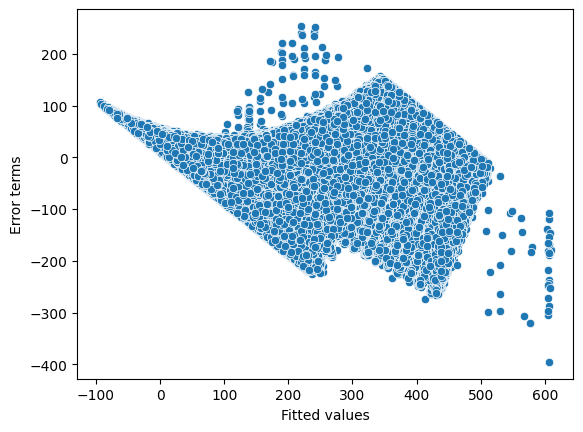

In [104]:
sns.scatterplot(x=model2.predict(xtrain_c),y=model2.resid)
plt.xlabel("Fitted values")
plt.ylabel("Error terms")

In [105]:
import statsmodels.stats.api as ssa

In [106]:
ssa.het_breuschpagan(model2.resid,model2.model.exog)[2::]

(np.float64(969.3284430455103), np.float64(0.0))

In [107]:
# IF the 2 value is greater than 0.05 it is homosekcadtic 
# else heteroskadastic 

In [108]:
from sklearn.preprocessing import StandardScaler # for scaling 

In [109]:
s=StandardScaler()

In [110]:
for i in xtrain.columns:
    xtrain[i]=s.fit_transform(xtrain[[i]])
    xtest[i]=s.transform(xtest[[i]])
    

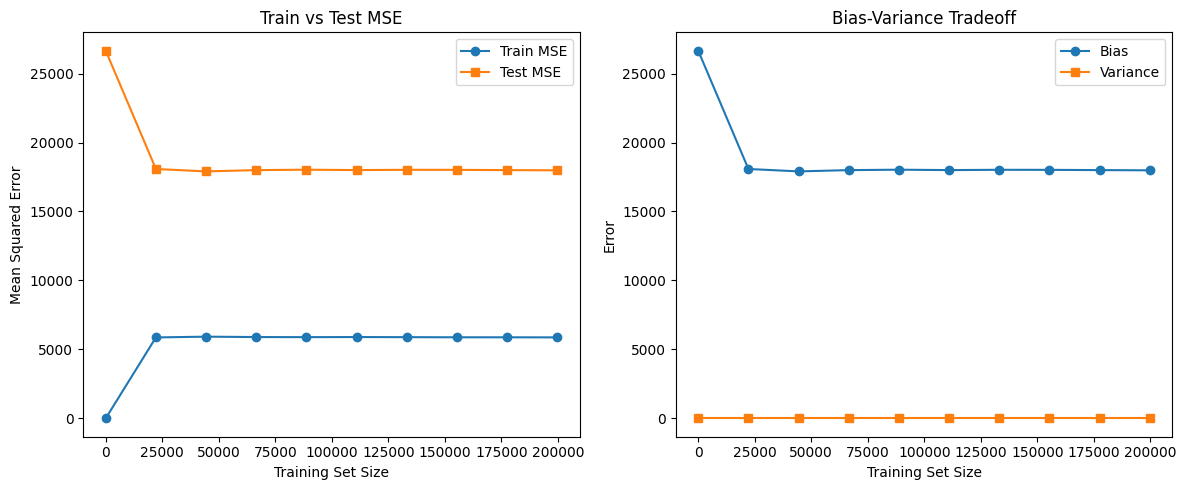

In [111]:

from sklearn.linear_model import LinearRegression

train_mse = []
test_mse = []
bias = []
variance = []


train_sizes = np.linspace(10, len(xtrain), 10, dtype=int)

for size in train_sizes:
    mse_list = []  
    y_pred_list = []  
    
    for _ in range(20):  
        X_sub, y_sub = xtrain[:size], ytrain[:size]
        model = LinearRegression()
        model.fit(X_sub, y_sub)
        
        y_pred = model.predict(xtest)
        mse = mean_squared_error(ytest, y_pred)
        
        mse_list.append(mse)
        y_pred_list.append(y_pred)
    
    
    y_pred_avg = np.mean(y_pred_list, axis=0)
    bias.append(np.mean((ytest - y_pred_avg) ** 2))
    variance.append(np.mean(np.var(y_pred_list, axis=0)))


    model.fit(xtrain[:size], ytrain[:size])
    train_mse.append(mean_squared_error(ytrain[:size], model.predict(xtrain[:size])))
    test_mse.append(mean_squared_error(ytest, model.predict(xtest)))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mse, label='Train MSE', marker='o')
plt.plot(train_sizes, test_mse, label='Test MSE', marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_sizes, bias, label='Bias', marker='o')
plt.plot(train_sizes, variance, label='Variance', marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()

plt.tight_layout()
plt.show()


In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
xtrain2 = xtrain.copy()

In [114]:
xtest2 = xtest.copy()

In [115]:
p = PolynomialFeatures(degree=3)

In [116]:
xtrain = p.fit_transform(xtrain)
xtest = p.transform(xtest)

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lr = LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

In [ ]:
r2_score(ytest,lr.predict(xtest))

-3.328470952398663e+18